In [101]:
import numpy as np
import statistics as stats
import scipy.stats as st
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import chi2_contingency

In [102]:
# 1. Generate a list of 100 integers containing values between 90 to 130 and store it in the variable `int_list`. after generating the list, find the following:
int_list = np.random.randint(90, 130, 100)

In [103]:
# (i) Write a Python function to calculate the mean of a given list of numbers. Create a function to find the median of a list of numbers
def find_mean(List):
    print("Mean Is:", np.mean(List))

find_mean(int_list)

def find_median(List):
    print("Median is:", np.median(List))

find_median(int_list)

Mean Is: 110.24
Median is: 110.0


In [104]:
# (ii) Develop a program to compute the mode of a list of integers.
def find_mode(List):
    print("Mode is", stats.mode(List))

find_mode(int_list)

Mode is 127


In [105]:
# (iii) Implement a function to calculate the weighted mean of a list of values and their corresponding weights.
def find_weighted_mean(Value, Weight):
    if len(Value) != len(Weight):
        print("Length not equal")
        return False

    weighted_sum = sum(Value * Weight for Value, Weight in zip(Value, Weight))
    weighted_mean = weighted_sum / sum(Weight)
    return weighted_mean

values = [10, 20, 30]
weights = [1, 2, 3]
print("Weighted Mean:", find_weighted_mean(values, weights))

Weighted Mean: 23.333333333333332


In [106]:
# (iv) Write a Python function to find the geometric mean of a list of positive numbers.

def find_Gmean(List):
    if not all(n > 0 for n in List):
        raise ValueError("All numbers must be positive.")
    return st.gmean(List)

Gmean_is = find_Gmean([2,4,5,6])
if Gmean_is:
    print("Gmean:", Gmean_is)

Gmean: 3.93597934253086


In [107]:
# (v) Create a program to calculate the harmonic mean of a list of values.
def harmonic_mean(Values):
    if not Values:
        raise ValueError("Values must be present")
    n = len(Values)

    if any(v <= 0 for v in Values):
        raise ValueError("Values must be postive")

    upon_value = sum(1/V for V in Values)

    return n/upon_value

harmonic_mean_is = harmonic_mean([2,3,4,5])
print("harmonic mean:", harmonic_mean_is)

harmonic mean: 3.116883116883117


In [108]:
# (vi) Build a function to determine the midrange of a list of numbers (average of the minimum and maximum).

def MidRange(List):
    if not List:
        raise ValueError("List must be present")

    min_val = min(List)
    max_val = max(List)

    return (min_val + max_val)/2

mid_range_is = MidRange([2,3,4,5])
print("Midrange is:", mid_range_is)

Midrange is: 3.5


In [109]:
# (vii) Implement a Python program to find the trimmed mean of a list, excluding a certain percentage of outliers.

def trimmed_mean(Values, proportion_to_cut):
    if not 0 <= proportion_to_cut < 0.5:
        raise ValueError("proportion_to_cut must be between 0 and 0.5")

    return st.trim_mean(values, proportion_to_cut)

values = [1, 2, 2, 3, 4, 5, 100]
proportion_to_cut = 0.1  # Exclude 10% from each end
print("Trimmed Mean:", trimmed_mean(values, proportion_to_cut))

Trimmed Mean: 16.714285714285715


In [110]:
 # 2. Generate a list of 500 integers containing values between 200 to 300 and store it in the variable `int_list2`. After generating the list, find the following:
int_list2 = np.random.randint(200, 300, 500)

In [111]:
# (i) Compare the given list of visualization for the given data:

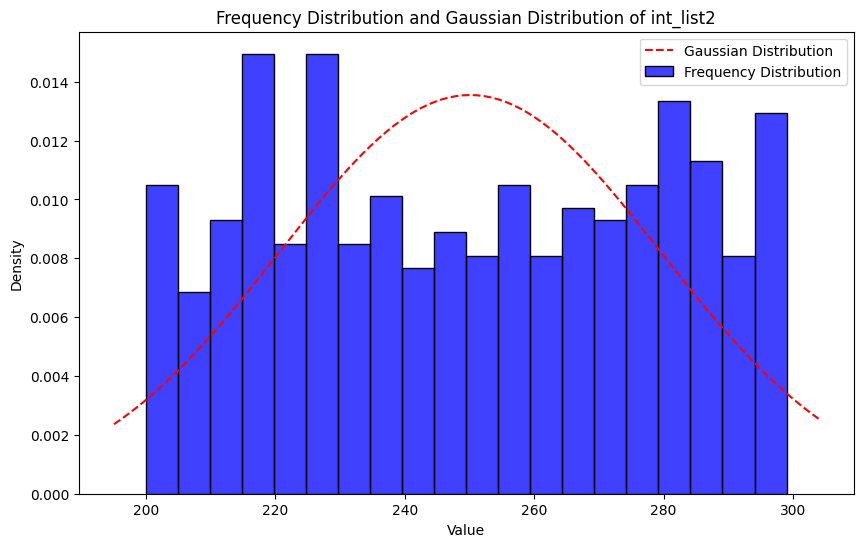

In [112]:
# 1. Frequency & Gaussian distribution
plt.figure(figsize=(10, 6))
sns.histplot(int_list2, bins=20, kde=False, color='blue', stat='density', label='Frequency Distribution')

mean, std = norm.fit(int_list2)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r--', label='Gaussian Distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Frequency Distribution and Gaussian Distribution of int_list2')
plt.legend()
plt.show()

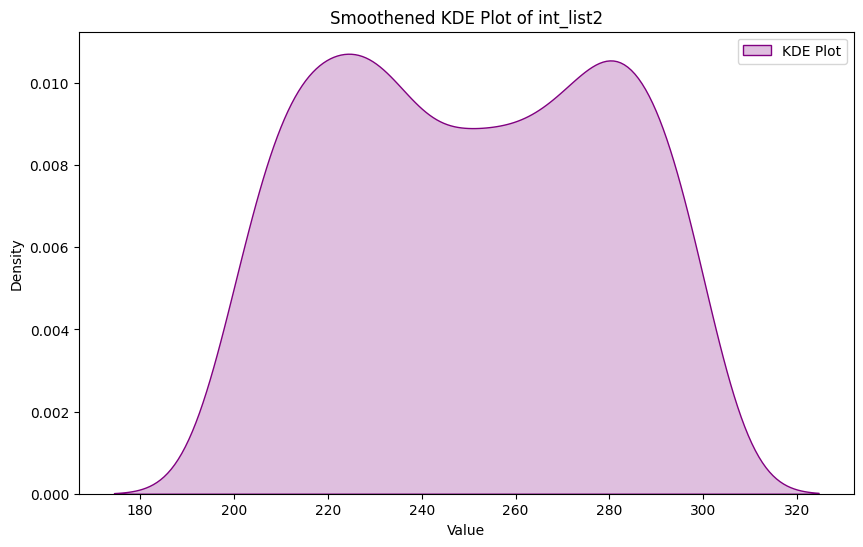

In [113]:
 # 2. Frequency smoothened KDE plot

plt.figure(figsize=(10, 6))
sns.kdeplot(int_list2, color='purple', fill=True, label='KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smoothened KDE Plot of int_list2')
plt.legend()
plt.show()

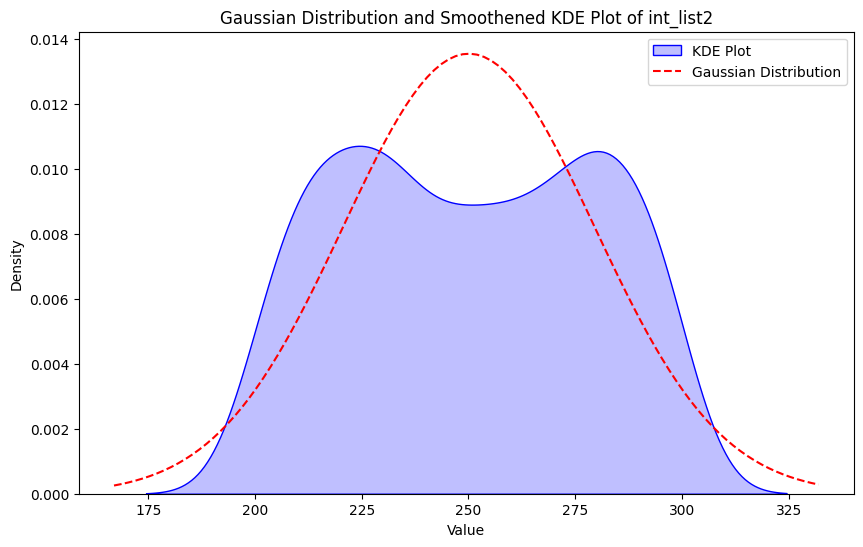

In [114]:
 # 3. Gaussian distribution & smoothened KDE plot

plt.figure(figsize=(10, 6))
sns.kdeplot(int_list2, color='blue', fill=True, label='KDE Plot')

mean, std = norm.fit(int_list2)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r--', label='Gaussian Distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Gaussian Distribution and Smoothened KDE Plot of int_list2')
plt.legend()
plt.show()

In [115]:
 # (ii) Write a Python function to calculate the range of a given list of numbers.

def calculate_range(numbers):
    if not numbers:
        raise ValueError("The list of numbers must not be empty.")
    
    return max(numbers) - min(numbers)

numbers = [10, 20, 30, 40, 50]
print("Range:", calculate_range(numbers))

Range: 40


In [116]:
 # (iii) Create a program to find the variance and standard deviation of a list of numbers.

def calculate_variance_std(numbers):
    if not numbers:
        raise ValueError("The list of numbers must not be empty.")
    
    numbers_array = np.array(numbers)
    variance = np.var(numbers_array, ddof=1)
    std_deviation = np.sqrt(variance)
    
    return variance, std_deviation


numbers = [10, 20, 30, 40, 50]
variance, std_deviation = calculate_variance_std(numbers)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)

Variance: 250.0
Standard Deviation: 15.811388300841896


In [117]:
# (iv) Implement a function to compute the interquartile range (IQR) of a list of values.

def compute_iqr(values):
    if not values:
        raise ValueError("The list of values must not be empty.")

    values_array = np.array(values)

    q1 = np.percentile(values_array, 25)
    q3 = np.percentile(values_array, 75)
    
    iqr = q3 - q1
    
    return iqr

values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
iqr = compute_iqr(values)
print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 45.0


In [118]:
# (v) Build a program to calculate the coefficient of variation for a dataset.

def calculate_coefficient_of_variation(data):
    if not data:
        raise ValueError("The dataset must not be empty.")
    
    data_array = np.array(data)
    
    mean = np.mean(data_array)
    std_dev = np.std(data_array, ddof=0)
    
    if mean == 0:
        raise ValueError("Mean of the dataset is zero, cannot compute CV.")
    
    cv = (std_dev / mean) * 100
    
    return cv

data = [10, 20, 30, 40, 50]
cv = calculate_coefficient_of_variation(data)
print("Coefficient of Variation (CV): {:.2f}%".format(cv))

Coefficient of Variation (CV): 47.14%


In [119]:
# (vi) Write a Python function to find the mean absolute deviation (MAD) of a list of numbers.

def mean_absolute_deviation(numbers):
    if not numbers:
        raise ValueError("The list of numbers must not be empty.")

    numbers_array = np.array(numbers)
    
    mean = np.mean(numbers_array)
    
    absolute_deviations = np.abs(numbers_array - mean)
    
    mad = np.mean(absolute_deviations)
    
    return mad

numbers = [10, 20, 30, 40, 50]
mad = mean_absolute_deviation(numbers)
print("Mean Absolute Deviation (MAD):", mad)

Mean Absolute Deviation (MAD): 12.0


In [120]:
# (vii) Create a program to calculate the quartile deviation of a list of values.

def quartile_deviation(values):
    if not values:
        raise ValueError("The list of values must not be empty.")
    
    values_array = np.array(values)
    
    q1 = np.percentile(values_array, 25)
    q3 = np.percentile(values_array, 75)
    
    qd = (q3 - q1) / 2
    
    return qd

values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
qd = quartile_deviation(values)
print("Quartile Deviation (QD):", qd)

Quartile Deviation (QD): 22.5


In [121]:
# (viii) Implement a function to find the range-based coefficient of dispersion for a dataset.

def range_based_coefficient_of_dispersion(data):
    if not data:
        raise ValueError("The dataset must not be empty.")
    
    data_array = np.array(data)
    
    mean = np.mean(data_array)
    data_range = np.max(data_array) - np.min(data_array)
    
    if mean == 0:
        raise ValueError("Mean of the dataset is zero, cannot compute Coefficient of Dispersion.")
    
    cd = (data_range / mean) * 100
    
    return cd

data = [10, 20, 30, 40, 50]
cd = range_based_coefficient_of_dispersion(data)
print("Range-Based Coefficient of Dispersion (CD): {:.2f}%".format(cd))

Range-Based Coefficient of Dispersion (CD): 133.33%


In [122]:
# 3 Write a Python class representing a discrete random variable with methods to calculate its expected value and variance.

class DiscreteRandomVariable:
    def __init__(self, probabilities, values):
        
        if len(probabilities) != len(values):
            raise ValueError("Probabilities and values must have the same length.")
        if not np.isclose(sum(probabilities), 1):
            raise ValueError("The sum of probabilities must be 1.")
        
        self.probabilities = np.array(probabilities)
        self.values = np.array(values)
    
    def expected_value(self):
        
        return np.sum(self.values * self.probabilities)
    
    def variance(self):
        
        mean = self.expected_value()
        return np.sum(self.probabilities * (self.values - mean)**2)

probabilities = [0.2, 0.5, 0.3]
values = [1, 2, 3]

random_variable = DiscreteRandomVariable(probabilities, values)

print("Expected Value (Mean):", random_variable.expected_value())
print("Variance:", random_variable.variance())

Expected Value (Mean): 2.0999999999999996
Variance: 0.49


In [123]:
# 4. Implement a program to simulate the rolling of a fair six-sided die and calculate the expected value and variance of the outcomes.

class FairDieSimulation:
    def __init__(self, num_rolls):

        if num_rolls <= 0:
            raise ValueError("Number of rolls must be a positive integer.")
        
        self.num_rolls = num_rolls
        self.rolls = self.simulate_rolls()
    
    def simulate_rolls(self):

        return np.random.randint(1, 7, self.num_rolls)
    
    def expected_value(self):
        
        return np.mean(self.rolls)
    
    def variance(self):

        return np.var(self.rolls, ddof=0)


num_rolls = 10000
die_simulation = FairDieSimulation(num_rolls)

print("Expected Value (Mean) of Die Rolls:", die_simulation.expected_value())
print("Variance of Die Rolls:", die_simulation.variance())

Expected Value (Mean) of Die Rolls: 3.4866
Variance of Die Rolls: 2.9268204399999997


In [124]:
# 5. Create a Python function to generate random samples from a given probability distribution (e.g., binomial, Poisson) and calculate their mean and variance.

def generate_samples_and_stats(distribution, params, num_samples):
    
    if num_samples <= 0:
        raise ValueError("Number of samples must be a positive integer.")
    
    if distribution == 'binomial':
        n, p = params
        samples = np.random.binomial(n, p, num_samples)
    elif distribution == 'poisson':
        lam = params[0]
        samples = np.random.poisson(lam, num_samples)
    else:
        raise ValueError("Unsupported distribution type. Use 'binomial' or 'poisson'.")
    
    mean = np.mean(samples)
    variance = np.var(samples, ddof=0)
    
    return mean, variance

# Binomial distribution
binomial_mean, binomial_variance = generate_samples_and_stats('binomial', (10, 0.5), 10000)
print("Binomial Distribution - Mean:", binomial_mean)
print("Binomial Distribution - Variance:", binomial_variance)

# Poisson distribution
poisson_mean, poisson_variance = generate_samples_and_stats('poisson', (5,), 10000)
print("Poisson Distribution - Mean:", poisson_mean)
print("Poisson Distribution - Variance:", poisson_variance)

Binomial Distribution - Mean: 4.9596
Binomial Distribution - Variance: 2.5233678400000006
Poisson Distribution - Mean: 5.006
Poisson Distribution - Variance: 5.016563999999999


In [125]:
# 6. Write a Python script to generate random numbers from a Gaussian (normal) distribution and compute the mean, variance, and standard deviation o6 the samples.

def generate_normal_samples_and_stats(mean, std_dev, num_samples):

    if num_samples <= 0:
        raise ValueError("Number of samples must be a positive integer.")
    
    samples = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
    
    sample_mean = np.mean(samples)
    sample_variance = np.var(samples, ddof=0)
    sample_std_dev = np.std(samples, ddof=0)
    
    return sample_mean, sample_variance, sample_std_dev

mean = 0
std_dev = 1
num_samples = 10000

mean_value, variance_value, std_dev_value = generate_normal_samples_and_stats(mean, std_dev, num_samples)

print("Mean of the samples:", mean_value)
print("Variance of the samples:", variance_value)
print("Standard Deviation of the samples:", std_dev_value)

Mean of the samples: 0.007075322182113743
Variance of the samples: 0.9807180218524083
Standard Deviation of the samples: 0.9903120830588751


In [126]:
# 7. Use seaborn library to load tips dataset. Find the following from the dataset for the columns total_bill and tip`:

In [127]:
# (i) Write a Python functnon that calculates their skewness.

def calculate_skewness(column):
    return skew(column.dropna())


tips = sns.load_dataset('tips')

# Calculate skewness for 'total_bill' and 'tip'
total_bill_skewness = calculate_skewness(tips['total_bill'])
tip_skewness = calculate_skewness(tips['tip'])

print("Skewness of 'total_bill':", total_bill_skewness)
print("Skewness of 'tip':", tip_skewness)

Skewness of 'total_bill': 1.1262346334818638
Skewness of 'tip': 1.4564266884221506


In [128]:
# (ii) Create a program that determines whether the columns exhibit positive skewness, negative skewness, or is approximately symmetric.

def calculate_skewness(column):
    return skew(column.dropna())

def determine_skewness_type(skewness, threshold=0.1):
    if skewness > threshold:
        return "Positive Skewness"
    elif skewness < -threshold:
        return "Negative Skewness"
    else:
        return "Approximately Symmetric"

# Load the tips dataset
tips = sns.load_dataset('tips')

# Calculate skewness for 'total_bill' and 'tip'
total_bill_skewness = calculate_skewness(tips['total_bill'])
tip_skewness = calculate_skewness(tips['tip'])

# Determine skewness type
total_bill_skewness_type = determine_skewness_type(total_bill_skewness)
tip_skewness_type = determine_skewness_type(tip_skewness)

print("Skewness of 'total_bill':", total_bill_skewness, "-", total_bill_skewness_type)
print("Skewness of 'tip':", tip_skewness, "-", tip_skewness_type)

Skewness of 'total_bill': 1.1262346334818638 - Positive Skewness
Skewness of 'tip': 1.4564266884221506 - Positive Skewness


In [129]:
# (iii) Write a Function that calculates the covariance between two columns.

def calculate_covariance(column1, column2):
    if len(column1) != len(column2):
        raise ValueError("Both columns must have the same length.")
    
    # Drop missing values
    column1 = column1.dropna()
    column2 = column2.dropna()
    
    # Ensure both series have the same length after dropping NA values
    if len(column1) != len(column2):
        raise ValueError("After dropping NA values, columns must have the same length.")
    
    # Calculate covariance using numpy
    covariance = np.cov(column1, column2, ddof=0)[0, 1]
    
    return covariance

# Load the tips dataset
tips = sns.load_dataset('tips')

covariance_total_bill_tip = calculate_covariance(tips['total_bill'], tips['tip'])
print("Covariance between 'total_bill' and 'tip':", covariance_total_bill_tip)

Covariance between 'total_bill' and 'tip': 8.289388917629669


In [130]:
# (iv) Implement a Python program that calculates the Pearson correlation coefficient between two columns.

def calculate_pearson_correlation(column1, column2):

    if len(column1) != len(column2):
        raise ValueError("Both columns must have the same length.")
    
    # Drop missing values
    column1 = column1.dropna()
    column2 = column2.dropna()
    
    # Ensure both series have the same length after dropping NA values
    if len(column1) != len(column2):
        raise ValueError("After dropping NA values, columns must have the same length.")
    
    # Calculate Pearson correlation coefficient using numpy
    correlation_matrix = np.corrcoef(column1, column2)
    pearson_correlation = correlation_matrix[0, 1]
    
    return pearson_correlation

# Load the tips dataset
tips = sns.load_dataset('tips')

# Calculate Pearson correlation coefficient between 'total_bill' and 'tip'
pearson_correlation_total_bill_tip = calculate_pearson_correlation(tips['total_bill'], tips['tip'])
print("Pearson correlation coefficient between 'total_bill' and 'tip':", pearson_correlation_total_bill_tip)

Pearson correlation coefficient between 'total_bill' and 'tip': 0.6757341092113645


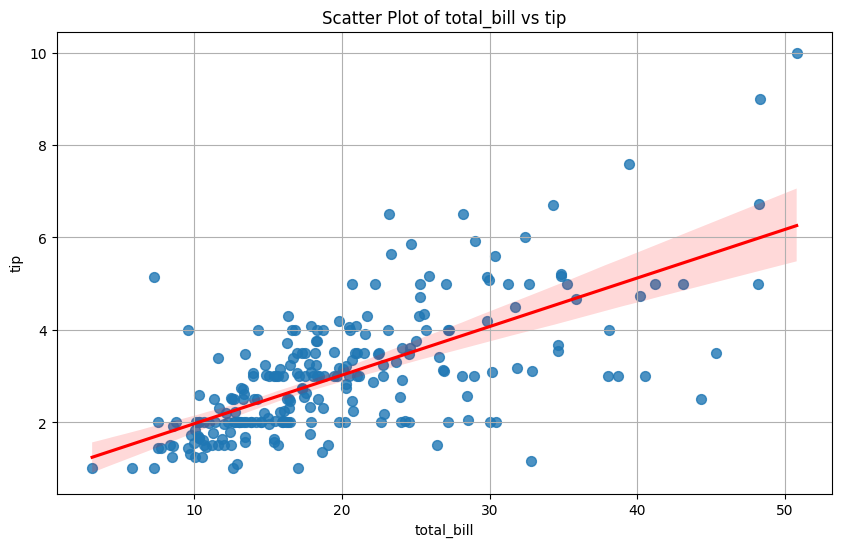

In [131]:
# (v) Write a script to visualize the correlation between two specific columns in a Pandas DataFrame using scatter plots.

def plot_correlation_scatter(df, col1, col2):
    
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError(f"Both columns must be present in the DataFrame. Available columns: {df.columns.tolist()}")

    # Create scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=col1, y=col2, data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
    
    # Set plot title and labels
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()

# Load the tips dataset
tips = sns.load_dataset('tips')

# Plot the correlation between 'total_bill' and 'tip'
plot_correlation_scatter(tips, 'total_bill', 'tip')

In [132]:
# 8. Write a Python function to calculate the probability density function (PDF) of a continuous random variable for a given normal distribution.

def calculate_pdf(x, mean, std_dev):
    return norm.pdf(x, loc=mean, scale=std_dev)

mean = 0
std_dev = 1
x = 0

pdf_value = calculate_pdf(x, mean, std_dev)
print(f"PDF value at x={x} for N(mean={mean}, std_dev={std_dev}):", pdf_value)

PDF value at x=0 for N(mean=0, std_dev=1): 0.3989422804014327


In [133]:
# 9 Create a program to calculate the cumulative distribution function (CDF) of exponential distribution.

def calculate_cdf(x, scale):
    return expon.cdf(x, scale=scale)

scale = 1
x = 2

cdf_value = calculate_cdf(x, scale)
print(f"CDF value at x={x} for Exponential(scale={scale}):", cdf_value)

CDF value at x=2 for Exponential(scale=1): 0.8646647167633873


In [134]:
# 10. Write a Python function to calculate the probability mass function (PMF) of Poisson distribution.

def calculate_pmf(k, lambda_):
    return poisson.pmf(k, mu=lambda_)

lambda_ = 3  # Average rate (mean) of events
k = 4        # Number of events

pmf_value = calculate_pmf(k, lambda_)
print(f"PMF value for k={k} with Poisson(lambda={lambda_}):", pmf_value)

PMF value for k=4 with Poisson(lambda=3): 0.16803135574154085


In [135]:
# 11. A company wants to test if a new website layout leads to a higher conversion rate (percentage of visitors who make a purchase). They collect data Nrom the old and new layouts to compare.

# old_layout and new_layout given
old_layout = np.array([1] * 50 + [0] * 950)
new_layout = np.array([1] * 70 + [0] * 930)

# Calculate sample sizes
n1 = len(old_layout)
n2 = len(new_layout)

# Calculate the number of successes
x1 = np.sum(old_layout)
x2 = np.sum(new_layout)

# Calculate sample proportions
p1 = x1 / n1
p2 = x2 / n2

# Pooled proportion
p = (x1 + x2) / (n1 + n2)

# Standard error
se = np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))

# Z-test statistic
z = (p1 - p2) / se

# P-value
p_value = 1 - st.norm.cdf(z)

# Output results
print(f"Z-test statistic: {z}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("The new layout has a significantly higher conversion rate.")
else:
    print("There is not enough evidence to suggest the new layout is better.")

Z-test statistic: -1.883108942886774
P-value: 0.9701571972337869
There is not enough evidence to suggest the new layout is better.


In [136]:
# 12. A tutoring service claims that its program improves students exam scores. A sample of students who participated in the program was taken, and their scores before and after the program were recorded.

# givent scores 
before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

# Calculate the differences
differences = after_program - before_program

# Perform the paired sample t-test
t_statistic, p_value = st.ttest_rel(after_program, before_program)

# Output results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("There is a significant improvement in scores after the program.")
else:
    print("There is not enough evidence to suggest a significant improvement in scores.")

T-statistic: 4.593190894944668
P-value: 0.0013030932910086035
There is a significant improvement in scores after the program.


In [137]:
# 13. A pharmaceutical company wants to determine if a new drug is effective in reducing blood pressure. They conduct a study and record blood pressure measurements beNore and aNter administering the drug.

before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

# Calculate the differences
differences = after_drug - before_drug

# Perform the paired sample t-test
t_statistic, p_value = st.ttest_rel(after_drug, before_drug)

# Output results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("The drug significantly reduces blood pressure.")
else:
    print("There is not enough evidence to suggest the drug reduces blood pressure.")

T-statistic: -10.04987562112089
P-value: 3.433031432681152e-06
The drug significantly reduces blood pressure.


In [138]:
# 14. A customer service department claims that their average response time is less than 5 minutesV A sample of recent customer interactions was taken, and the response times were recorded.
response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])

# Known value (the claimed average response time)
claimed_mean = 5

# Perform the one-sample t-test
t_statistic, p_value = st.ttest_1samp(response_times, claimed_mean)

# Output results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha and t_statistic < 0:
    print("The average response time is significantly less than 5 minutes.")
else:
    print("There is not enough evidence to suggest that the average response time is less than 5 minutes.")

T-statistic: -3.1844572260429627
P-value: 0.011104982316785018
The average response time is significantly less than 5 minutes.


In [139]:
# 15. A company is testing two different website layouts to see which one leads to higher click-through rates. Write a Python function to perform an A/B test analysis, including calculating the t-statistic, degrees of freedom, and p-value.

layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]

def ab_test_analysis(layout_a, layout_b):
    # Calculate the means
    mean_a = np.mean(layout_a)
    mean_b = np.mean(layout_b)
    
    # Calculate the variances
    var_a = np.var(layout_a, ddof=1)
    var_b = np.var(layout_b, ddof=1)
    
    # Number of observations in each group
    n_a = len(layout_a)
    n_b = len(layout_b)
    
    # Calculate the t-statistic
    t_statistic = (mean_a - mean_b) / np.sqrt((var_a/n_a) + (var_b/n_b))
    
    # Degrees of freedom
    df = (((var_a/n_a) + (var_b/n_b))**2) / (((var_a/n_a)**2/(n_a-1)) + ((var_b/n_b)**2/(n_b-1)))
    
    # Calculate the p-value (two-tailed test)
    p_value = st.t.sf(np.abs(t_statistic), df) * 2
    
    return t_statistic, df, p_value

# Click-through rates for Layout A and Layout B
layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]

# Perform the A/B test analysis
t_stat, degrees_of_freedom, p_val = ab_test_analysis(layout_a_clicks, layout_b_clicks)

# Output results
print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_val}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("There is a significant difference between the two layouts.")
else:
    print("There is no significant difference between the two layouts.")

T-statistic: -7.298102156175071
Degrees of freedom: 17.879871863320876
P-value: 9.196596070789357e-07
There is a significant difference between the two layouts.


In [140]:
# 16. A pharmaceutical company wants to determine if a new drug is more effective than an existing drug in reducing cholesterol levels. Create a program to analyze the clinical trial data and calculate the tstatistic and p-value for the treatment effect.

def analyze_treatment_effect(existing_drug, new_drug):
    # Calculate the means
    mean_existing = np.mean(existing_drug)
    mean_new = np.mean(new_drug)
    
    # Calculate the variances
    var_existing = np.var(existing_drug, ddof=1)
    var_new = np.var(new_drug, ddof=1)
    
    # Number of observations in each group
    n_existing = len(existing_drug)
    n_new = len(new_drug)
    
    # Calculate the t-statistic
    t_statistic = (mean_existing - mean_new) / np.sqrt((var_existing/n_existing) + (var_new/n_new))
    
    # Degrees of freedom
    df = (((var_existing/n_existing) + (var_new/n_new))**2) / (((var_existing/n_existing)**2/(n_existing-1)) + ((var_new/n_new)**2/(n_new-1)))
    
    # Calculate the p-value (two-tailed test)
    p_value = st.t.sf(np.abs(t_statistic), df) * 2
    
    return t_statistic, df, p_value

# Cholesterol levels for the existing and new drugs
existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]

# Perform the analysis
t_stat, degrees_of_freedom, p_val = analyze_treatment_effect(existing_drug_levels, new_drug_levels)

# Output results
print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_val}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("There is a significant difference between the effectiveness of the two drugs.")
else:
    print("There is no significant difference between the effectiveness of the two drugs.")

T-statistic: 4.14048098620866
Degrees of freedom: 17.866770765582338
P-value: 0.0006229228945469307
There is a significant difference between the effectiveness of the two drugs.


In [141]:
# 17. A school district introduces an educational intervention program to improve math scores. Write a Python function to analyze pre- and post-intervention test scores, calculating the t-statistic and p-value to determine if the intervention had a significant impact.

def analyze_intervention(pre_scores, post_scores):
    # Calculate the differences
    differences = np.array(post_scores) - np.array(pre_scores)
    
    # Calculate the mean and standard deviation of the differences
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)
    
    # Number of observations
    n = len(differences)
    
    # Calculate the t-statistic
    t_statistic = mean_diff / (std_diff / np.sqrt(n))
    
    # Degrees of freedom
    df = n - 1
    
    # Calculate the p-value (two-tailed test)
    p_value = st.t.sf(np.abs(t_statistic), df) * 2
    
    return t_statistic, df, p_value

# Pre- and post-intervention math scores
pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]

# Perform the analysis
t_stat, degrees_of_freedom, p_val = analyze_intervention(pre_intervention_scores, post_intervention_scores)

# Output results
print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_val}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("The intervention had a significant impact on math scores.")
else:
    print("The intervention did not have a significant impact on math scores.")

T-statistic: 4.428408839657611
Degrees of freedom: 9
P-value: 0.0016509548165795493
The intervention had a significant impact on math scores.


In [142]:
# 18. An HR department wants to investigate if there's a gender-based salary gap within the company. Develop a program to analyze salary data, calculate the t-statistic, and determine if there's a statistically significant difference between the average salaries of male and female employees.

def analyze_salary_gap(male_salaries, female_salaries):
    # Calculate the means
    mean_male = np.mean(male_salaries)
    mean_female = np.mean(female_salaries)
    
    # Calculate the variances
    var_male = np.var(male_salaries, ddof=1)
    var_female = np.var(female_salaries, ddof=1)
    
    # Number of observations in each group
    n_male = len(male_salaries)
    n_female = len(female_salaries)
    
    # Calculate the t-statistic
    t_statistic = (mean_male - mean_female) / np.sqrt((var_male/n_male) + (var_female/n_female))
    
    # Degrees of freedom
    df = (((var_male/n_male) + (var_female/n_female))**2) / (((var_male/n_male)**2/(n_male-1)) + ((var_female/n_female)**2/(n_female-1)))
    
    # Calculate the p-value (two-tailed test)
    p_value = st.t.sf(np.abs(t_statistic), df) * 2
    
    return t_statistic, df, p_value

# Salary data for male and female employees
np.random.seed(0)  # For reproducibility
male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
female_salaries = np.random.normal(loc=55000, scale=9000, size=20)

# Perform the analysis
t_stat, degrees_of_freedom, p_val = analyze_salary_gap(male_salaries, female_salaries)

# Output results
print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_val}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("There is a statistically significant difference between the average salaries of male and female employees.")
else:
    print("There is no statistically significant difference between the average salaries of male and female employees.")

T-statistic: 0.06114208969631383
Degrees of freedom: 36.166783312917644
P-value: 0.9515826849267928
There is no statistically significant difference between the average salaries of male and female employees.


In [143]:
# 19. A manufacturer produces two different versions of a product and wants to compare their quality scores. Create a Python function to analyze quality assessment data, calculate the t-statistic, and decide whether there's a signi@icant di@@erence in quality between the two versions.


def analyze_quality_scores(version1_scores, version2_scores):
    # Calculate the means
    mean_v1 = np.mean(version1_scores)
    mean_v2 = np.mean(version2_scores)
    
    # Calculate the variances
    var_v1 = np.var(version1_scores, ddof=1)
    var_v2 = np.var(version2_scores, ddof=1)
    
    # Number of observations in each group
    n_v1 = len(version1_scores)
    n_v2 = len(version2_scores)
    
    # Calculate the t-statistic
    t_statistic = (mean_v1 - mean_v2) / np.sqrt((var_v1/n_v1) + (var_v2/n_v2))
    
    # Degrees of freedom
    df = (((var_v1/n_v1) + (var_v2/n_v2))**2) / (((var_v1/n_v1)**2/(n_v1-1)) + ((var_v2/n_v2)**2/(n_v2-1)))
    
    # Calculate the p-value (two-tailed test)
    p_value = st.t.sf(np.abs(t_statistic), df) * 2
    
    return t_statistic, df, p_value

# Quality scores for the two versions
version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]

# Perform the analysis
t_stat, degrees_of_freedom, p_val = analyze_quality_scores(version1_scores, version2_scores)

# Output results
print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_val}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("There is a statistically significant difference in quality between the two versions.")
else:
    print("There is no statistically significant difference in quality between the two versions.")

T-statistic: 11.325830417646698
Degrees of freedom: 44.47061033283037
P-value: 1.078754084378157e-14
There is a statistically significant difference in quality between the two versions.


In [144]:
# 20. A restaurant chain collects customer satisfaction scores for two different branches. Write a program to analyze the scores, calculate the t-statistic, and determine if there's a statistically significant difference in customer satisfaction between the branches.

def analyze_satisfaction_scores(branch_a_scores, branch_b_scores):
    # Calculate the means
    mean_a = np.mean(branch_a_scores)
    mean_b = np.mean(branch_b_scores)
    
    # Calculate the variances
    var_a = np.var(branch_a_scores, ddof=1)
    var_b = np.var(branch_b_scores, ddof=1)
    
    # Number of observations in each group
    n_a = len(branch_a_scores)
    n_b = len(branch_b_scores)
    
    # Calculate the t-statistic
    t_statistic = (mean_a - mean_b) / np.sqrt((var_a/n_a) + (var_b/n_b))
    
    # Degrees of freedom
    df = (((var_a/n_a) + (var_b/n_b))**2) / (((var_a/n_a)**2/(n_a-1)) + ((var_b/n_b)**2/(n_b-1)))
    
    # Calculate the p-value (two-tailed test)
    p_value = st.t.sf(np.abs(t_statistic), df) * 2
    
    return t_statistic, df, p_value

# Customer satisfaction scores for the two branches
branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]

# Perform the analysis
t_stat, degrees_of_freedom, p_val = analyze_satisfaction_scores(branch_a_scores, branch_b_scores)

# Output results
print(f"T-statistic: {t_stat}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_val}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("There is a statistically significant difference in customer satisfaction between the two branches.")
else:
    print("There is no statistically significant difference in customer satisfaction between the two branches.")

T-statistic: 5.480077554195743
Degrees of freedom: 60.0
P-value: 8.895290509945657e-07
There is a statistically significant difference in customer satisfaction between the two branches.


In [145]:
# 21. A political analyst wants to determine if there is a significant association between age groups and voter preferences FCandidate A or Candidate B). They collect data from a sample of 500 voters and classify them into different age groups and candidate preferences. Perform a Chi-Square test to determine if there is a significant association between age groups and voter preferences.

# given data 
np.random.seed(0)
age_groups = np.random.choice(['18-30', '31-50', '51+'], size=500)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=500)

# Create a contingency table
contingency_table = pd.crosstab(age_groups, voter_preferences)

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-Value:", p_val)

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("\nThere is a significant association between age groups and voter preferences.")
else:
    print("\nThere is no significant association between age groups and voter preferences.")

Contingency Table:
col_0  Candidate A  Candidate B
row_0                          
18-30           95           87
31-50           87           82
51+             84           65

Chi-Square Statistic: 0.8779923945254768
Degrees of Freedom: 2
P-Value: 0.6446832311860852

There is no significant association between age groups and voter preferences.


In [146]:
# 22. A company conducted a customer satisfaction survey to determine if there is a significant relationship between product satisfaction levels (Satisfied, Neutral, Dissatisfied) and the region where customers are located (East, West, North, South). The survey data is summarized in a contingency table. Conduct a ChiSquare test to determine if there is a significant relationship between product satisfaction levels and customer regions.

# Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)
data = np.array([[50, 30, 40, 20], [30, 40, 30, 50], [20, 30, 40, 30]])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(data)

# Output results
print("Observed Data (Contingency Table):")
print(data)
print("\nExpected Data (under Null Hypothesis):")
print(np.round(expected, 2))
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-Value:", p_val)

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("\nThere is a significant relationship between product satisfaction levels and customer regions.")
else:
    print("\nThere is no significant relationship between product satisfaction levels and customer regions.")

Observed Data (Contingency Table):
[[50 30 40 20]
 [30 40 30 50]
 [20 30 40 30]]

Expected Data (under Null Hypothesis):
[[34.15 34.15 37.56 34.15]
 [36.59 36.59 40.24 36.59]
 [29.27 29.27 32.2  29.27]]

Chi-Square Statistic: 27.777056277056275
Degrees of Freedom: 6
P-Value: 0.00010349448486004387

There is a significant relationship between product satisfaction levels and customer regions.


In [147]:
 # 23. A company implemented an employee training program to improve job performance (Effective, Neutral, Ineffective). After the training, they collected data from a sample of employees and classified them based on their job performance before and after the training. Perform a Chi-Square test to determine if there is a significant difference between job performance levels before and after the training.

# Sample data: Job performance levels before (rows) and after (columns) training
data = np.array([[50, 30, 20], [30, 40, 30], [20, 30, 40]])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(data)

# Output results
print("Observed Data (Contingency Table):")
print(data)
print("\nExpected Data (under Null Hypothesis):")
print(np.round(expected, 2))
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-Value:", p_val)

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("\nThere is a significant difference between job performance levels before and after the training.")
else:
    print("\nThere is no significant difference between job performance levels before and after the training.")

Observed Data (Contingency Table):
[[50 30 20]
 [30 40 30]
 [20 30 40]]

Expected Data (under Null Hypothesis):
[[34.48 34.48 31.03]
 [34.48 34.48 31.03]
 [31.03 31.03 27.93]]

Chi-Square Statistic: 22.161728395061726
Degrees of Freedom: 4
P-Value: 0.00018609719479882554

There is a significant difference between job performance levels before and after the training.


In [148]:
 # 24. A company produces three different versions of a product: Standard, Premium, and Deluxe. The company wants to determine if there is a significant difference in customer satisfaction scores among the three product versions. They conducted a survey and collected customer satisfaction scores for each version from a random sample of customers. Perform an ANOVA test to determine if there is a significant difference in customer satisfaction scores.

# Sample data: Customer satisfaction scores for each product version
standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]

# Perform the one-way ANOVA test
f_stat, p_val = st.f_oneway(standard_scores, premium_scores, deluxe_scores)

# Output results
print("F-Statistic:", f_stat)
print("P-Value:", p_val)

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("\nThere is a significant difference in customer satisfaction scores among the three product versions.")
else:
    print("\nThere is no significant difference in customer satisfaction scores among the three product versions.")


F-Statistic: 27.03556231003039
P-Value: 3.578632885734896e-07

There is a significant difference in customer satisfaction scores among the three product versions.
